In [1]:
import sys
molgen_path = "../"
if molgen_path not in sys.path:
    sys.path.insert(0, molgen_path)

In [4]:
from rdkit import Chem
from rdkit.Chem import Mol
from rdkit.Chem import inchi

def is_same_molecule(mol1: Mol, mol2: Mol):
    inchi1 = inchi.MolToInchiKey(mol1)
    inchi2 = inchi.MolToInchiKey(mol2)
    return inchi1 == inchi2

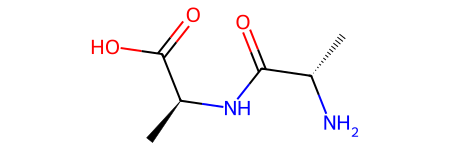

In [5]:
mol_h = Chem.MolFromHELM("PEPTIDE1{A.A}$$$$")
mol_h

In [28]:
mol_a1 = Chem.MolFromSmiles("C[C@H](N[*])C([*])=O |$;;;_R1;;_R2;$|")
for a in mol_a1.GetAtoms():
    if a.HasProp('atomLabel'):
        print(a.GetProp("atomLabel"))
for a in mol_a1.GetAtoms():
    print(str(a.GetAtomMapNum()) + ", " + a.GetSymbol())

_R1
_R2
0, C
0, C
0, N
0, *
0, C
0, *
0, O


In [34]:
def combine_monomers(m1: Mol, m2: Mol):
    for atm in m1.GetAtoms():
        if atm.HasProp('atomLabel') and atm.GetProp('atomLabel') == '_R2':
            atm.SetAtomMapNum(1)
    for atm in m2.GetAtoms():
        if atm.HasProp('atomLabel') and atm.GetProp('atomLabel') == '_R1':
            atm.SetAtomMapNum(1)
    return Chem.molzip(m1, m2)

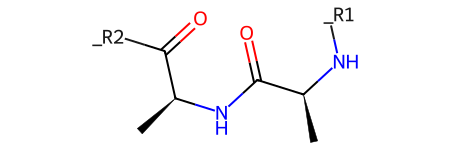

In [35]:
mol_a1 = Chem.MolFromSmiles("C[C@H](N[*])C([*])=O |$;;;_R1;;_R2;$|")
mol_a2 = Chem.MolFromSmiles("C[C@H](N[*])C([*])=O |$;;;_R1;;_R2;$|")
combine_monomers(mol_a1, mol_a2)